In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.image as mpimg
import urllib

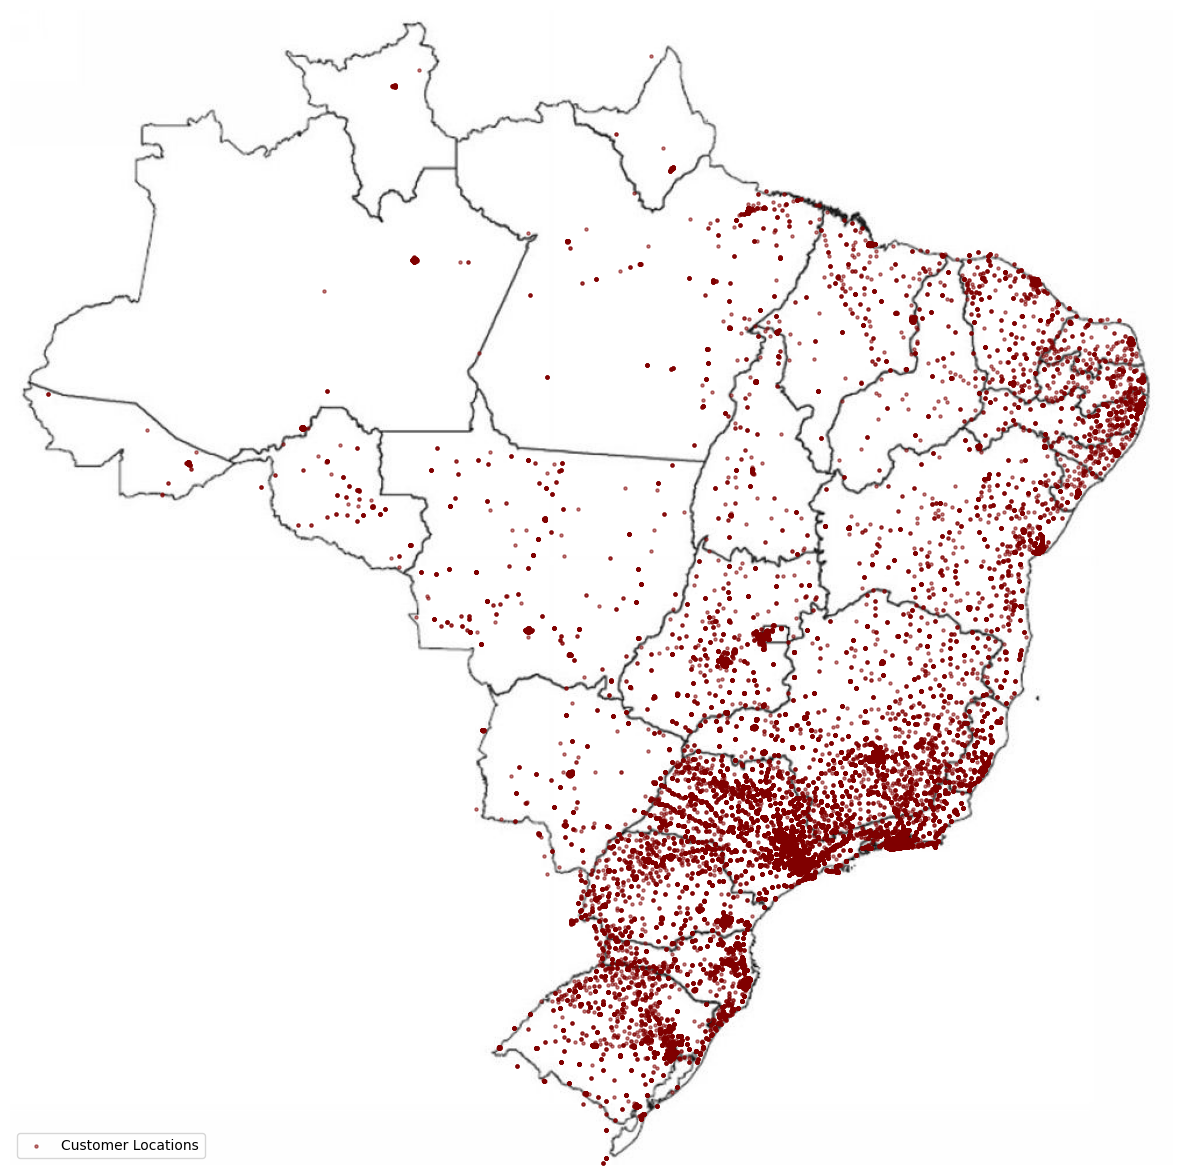

In [8]:
customers_df = pd.read_csv('olist_customers_dataset.csv')
geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')

merged_customers = pd.merge(customers_df, geolocation_df, how='inner', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

def plot_brazil_map(data):

    url = 'https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'
    img = mpimg.imread(urllib.request.urlopen(url), 'jpg')

    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(data['geolocation_lng'], data['geolocation_lat'], alpha=0.5, s=5, c='maroon', label='Customer Locations')

    ax.imshow(img, extent=[-73.98283055, -33.8, -33.75116944, 5.4], aspect='auto')
    ax.set_axis_off()
    
    plt.legend(loc='lower left')
    plt.show()

plot_brazil_map(merged_customers.drop_duplicates(subset='customer_unique_id'))

## Data yang saya akan gunakan untuk visualisasi berasal dari gabungan dua dataset: 
1. **`olist_customers_dataset.csv`**: Data yang memuat informasi pelanggan, termasuk kode pos.
2. **`olist_geolocation_dataset.csv`**: Data yang berisi informasi geografis (latitude, longitude) terkait kode pos.

Gabungan dari kedua dataset ini memungkinkan kita untuk memetakan lokasi pelanggan berdasarkan geolokasi kode pos mereka.

## Menentukan Tujuan, User, Fungsi, dan Tone yang Sesuai dengan Visualisasi

## 1. Tujuan:
   - Tujuan dari visualisasi ini adalah untuk **memetakan distribusi geografis pelanggan di Brasil** yang berbelanja di platform e-commerce Olist. 
   - Visualisasi akan menunjukkan **persebaran pelanggan** di berbagai wilayah di Brasil, membantu memahami konsentrasi pengguna e-commerce berdasarkan lokasi.
   
## 2. User:
   - **Tim Pemasaran dan Manajemen Olist**: Mereka dapat menggunakan informasi ini untuk menargetkan kampanye pemasaran berdasarkan distribusi geografis pelanggan.
   - **Peneliti atau Data Analyst**: Untuk menganalisis pola belanja pelanggan terkait dengan lokasi geografis mereka dan mengidentifikasi peluang pasar baru.
   - **Pemangku Kebijakan**: Untuk mempelajari dan memfasilitasi pengembangan infrastruktur e-commerce di berbagai wilayah di Brasil.

## 3. Fungsi:
   - **Pemahaman Geografis**: Menyediakan gambaran visual tentang **persebaran pelanggan di seluruh Brasil**, menunjukkan daerah-daerah dengan konsentrasi tinggi.
   - **Identifikasi Wilayah Pasar**: Mengidentifikasi wilayah dengan potensi pasar yang belum tergarap, atau sebaliknya, wilayah yang sudah memiliki penetrasi pasar yang tinggi.
   - **Analisis dan Pengambilan Keputusan**: Membantu pemangku kepentingan untuk membuat keputusan berbasis data tentang strategi pemasaran, logistik, atau ekspansi layanan.
   
## 4. Tone:
   - **Informatif dan Profesional**: Visualisasi harus bersifat **informasional** dan **berfokus pada data**. Tidak memerlukan warna-warna yang terlalu mencolok, namun harus jelas dan mudah dipahami.
   - **Netral dan Faktual**: Informasi yang disajikan bersifat data-driven sehingga tone-nya netral dan berdasarkan fakta tanpa opini atau interpretasi berlebih.

Dengan demikian, visualisasi ini berfungsi sebagai alat yang membantu memahami distribusi pelanggan untuk keperluan strategis dan operasional di e-commerce Olist.


In [ ]:
customers_df = pd.read_csv('olist_customers_dataset.csv')
geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')

merged_customers = pd.merge(customers_df, geolocation_df, how='inner', 
                            left_on='customer_zip_code_prefix', 
                            right_on='geolocation_zip_code_prefix')

def plot_brazil_map(data):
    brazil_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

    marker_cluster = MarkerCluster().add_to(brazil_map)
    
    for idx, row in data.iterrows():
        folium.Marker(
            location=[row['geolocation_lat'], row['geolocation_lng']],
            popup=f"Customer ID: {row['customer_unique_id']}",
        ).add_to(marker_cluster)
    
    return brazil_map

map_brazil = plot_brazil_map(merged_customers.drop_duplicates(subset='customer_unique_id'))
map_brazil.save('brazil_customer_map.html')
map_brazil

### **Menentukan Data yang Akan Digunakan dalam Visualisasi**

Data yang dipilih untuk visualisasi ini berasal dari dua dataset yang relevan:
1. **`olist_customers_dataset.csv`**: Berisi data pelanggan, termasuk kode pos pelanggan, yang mewakili lokasi pelanggan.
2. **`olist_geolocation_dataset.csv`**: Dataset ini berisi informasi geolokasi (latitude dan longitude) berdasarkan kode pos. Data ini memungkinkan kita memetakan distribusi pelanggan secara geografis.

Setelah menggabungkan kedua dataset ini menggunakan kode pos sebagai kunci, kita dapat memperoleh informasi geografis tentang lokasi setiap pelanggan.

### **Menentukan Tujuan, User, Fungsi, dan Tone untuk Visualisasi**

#### **1. Tujuan:**
- **Tujuan utama** dari visualisasi ini adalah untuk **memetakan distribusi geografis pelanggan Olist di seluruh Brasil** dengan peta interaktif. Visualisasi ini memungkinkan kita untuk mengidentifikasi pola distribusi pelanggan berdasarkan geolokasi dan mengelompokkan pelanggan di wilayah tertentu.
- Menggunakan **Folium**, visualisasi ini akan menampilkan fitur interaktif seperti **Marker Clusters** yang mengelompokkan titik-titik pelanggan yang berdekatan. Fitur ini memudahkan eksplorasi area dengan konsentrasi pelanggan tinggi atau rendah.

#### **2. User (Pengguna):**
- **Tim Pemasaran**: Dapat menggunakan peta ini untuk memahami persebaran pelanggan di seluruh Brasil, sehingga mereka bisa menargetkan kampanye pemasaran yang lebih efektif berdasarkan wilayah dengan banyak atau sedikit pelanggan.
- **Tim Logistik**: Dapat memanfaatkan peta ini untuk merencanakan pengiriman dan optimalisasi distribusi barang, terutama dengan memahami lokasi yang padat pelanggan.
- **Analis Data**: Membantu mereka melakukan analisis lebih lanjut terkait pola distribusi pelanggan dan mengidentifikasi wilayah potensial untuk pertumbuhan bisnis e-commerce.

#### **3. Fungsi:**
- **Fungsi Interaktif**: Visualisasi dengan **Folium** memungkinkan peta bersifat interaktif. Pengguna bisa memperbesar/memperkecil peta serta melihat titik-titik pelanggan dengan detail lebih lanjut (misalnya, ID pelanggan) hanya dengan mengklik marker di peta.
- **Pengelompokan dengan MarkerCluster**: Fitur **Marker Cluster** mempermudah pemahaman wilayah dengan konsentrasi pelanggan tinggi. Ketika titik-titik pelanggan terlalu rapat, mereka akan dikelompokkan menjadi satu, dan pengguna dapat memperbesar untuk melihat detail lebih lanjut.
- **Pengambilan Keputusan Berbasis Data**: Peta ini membantu pengguna dalam membuat keputusan strategis, baik dalam hal pemasaran, distribusi, maupun analisis data pelanggan.

#### **4. Tone:**
- **Informatif dan Profesional**: Visualisasi ini bersifat profesional, dengan fokus pada data dan fungsionalitas. **Folium** menyediakan tampilan yang bersih dan terstruktur, memastikan peta mudah dipahami dan dieksplorasi.
- **Netral dan Berbasis Data**: Tone dari visualisasi ini harus tetap objektif dan berbasis data, tanpa interpretasi atau kesimpulan yang berlebihan. Data ditampilkan sebagaimana adanya, dan visualisasi berfungsi untuk memudahkan pemahaman.

### **Kesimpulan**
Dengan menggunakan data geolokasi dan pelanggan, peta interaktif ini akan membantu berbagai pemangku kepentingan dalam memahami persebaran pelanggan Olist di Brasil. **Tim pemasaran, logistik, dan analis data** bisa mendapatkan wawasan yang sangat bermanfaat untuk membuat keputusan yang lebih efektif dan efisien.


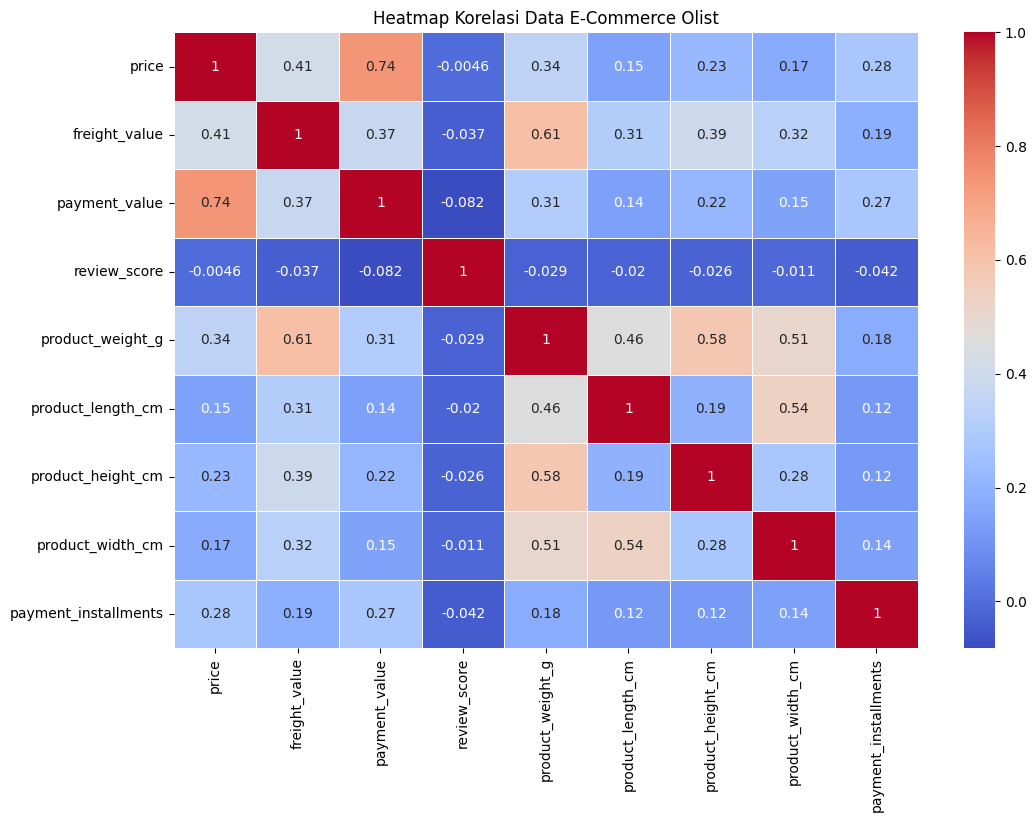

In [28]:
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')

merged_data = pd.merge(order_items_df, orders_df, on='order_id', how='inner')
merged_data = pd.merge(merged_data, order_payments_df, on='order_id', how='inner')
merged_data = pd.merge(merged_data, order_reviews_df, on='order_id', how='inner')
merged_data = pd.merge(merged_data, products_df, on='product_id', how='inner')

relevant_data = merged_data[['price', 'freight_value', 'payment_value', 'review_score', 
                             'product_weight_g', 'product_length_cm', 'product_height_cm', 
                             'product_width_cm', 'payment_installments']]

relevant_data = relevant_data.dropna()

correlation_matrix = relevant_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Data E-Commerce Olist')
plt.show()

### 1. **Menentukan Data yang Akan Digunakan dalam Visualisasi**

Berdasarkan dataset E-Commerce Olist yang telah dimuat, data berikut dipilih untuk visualisasi korelasi:

- **`price`**: Harga produk
- **`freight_value`**: Biaya pengiriman
- **`payment_value`**: Nilai total pembayaran
- **`review_score`**: Skor ulasan pelanggan
- **`product_weight_g`**: Berat produk (gram)
- **`product_length_cm`**: Panjang produk (cm)
- **`product_height_cm`**: Tinggi produk (cm)
- **`product_width_cm`**: Lebar produk (cm)
- **`payment_installments`**: Jumlah cicilan pembayaran

Data ini memberikan gambaran komprehensif tentang produk, dimensi, pembayaran, dan umpan balik pelanggan serta memungkinkan identifikasi pola atau hubungan antar variabel.

### 2. **Menentukan Tujuan, User, Fungsi, dan Tone dari Visualisasi**

#### a. **Tujuan Visualisasi**
Tujuan dari visualisasi korelasi ini meliputi:
- **Mengidentifikasi hubungan antar variabel** dalam dataset E-Commerce Olist untuk menemukan wawasan penting terkait harga produk, pengiriman, ulasan pelanggan, dan pembayaran.
- **Menentukan faktor yang mempengaruhi harga dan total pembayaran**, serta memeriksa apakah ulasan pelanggan memiliki hubungan dengan variabel lain seperti biaya pengiriman.
- **Menyajikan wawasan yang mudah dipahami** untuk membantu pengambil keputusan bisnis dalam merumuskan strategi berbasis data.

#### b. **User (Pengguna Visualisasi)**
Pengguna visualisasi ini termasuk:
- **Manajer E-Commerce dan Analis Bisnis**: Menggunakan visualisasi ini untuk membuat keputusan terkait strategi harga, pengiriman, dan evaluasi kepuasan pelanggan.
- **Tim Data Science atau Analis Data**: Melakukan analisis lebih lanjut untuk menemukan pola atau tren dalam data penjualan dan pengiriman.
- **Tim Marketing**: Mengevaluasi apakah harga dan ulasan produk berdampak pada kampanye pemasaran serta strategi untuk meningkatkan pengalaman pelanggan.

#### c. **Fungsi Visualisasi**
Visualisasi ini memiliki beberapa fungsi utama:
- **Mengungkap hubungan antar variabel** seperti pengaruh berat produk terhadap biaya pengiriman atau hubungan antara harga dan ulasan pelanggan.
- **Mendukung pengambilan keputusan yang lebih tepat**, terutama terkait harga produk, manajemen inventaris, dan optimasi biaya pengiriman.
- **Menyajikan korelasi antar variabel secara visual**, sehingga pengguna dapat cepat mengidentifikasi pola tanpa memerlukan interpretasi tabel korelasi yang kompleks.

#### d. **Tone (Nada)**
- **Profesional dan Informasional**: Visualisasi harus profesional dan mudah dipahami oleh audiens bisnis, dengan penggunaan warna netral yang memudahkan interpretasi (misalnya, biru untuk korelasi negatif dan merah untuk korelasi positif).
- **Berbasis Data dan Obyektif**: Visualisasi harus obyektif, berfokus pada penyajian data yang akurat sehingga tim bisnis dapat membuat keputusan berdasarkan data yang valid dan relevan.

### **Kesimpulan**
Visualisasi korelasi ini akan sangat membantu tim manajer, analis data, dan tim marketing dalam memahami hubungan antara harga, dimensi produk, ulasan, pembayaran, dan biaya pengiriman di E-Commerce Olist. Dengan pendekatan yang profesional dan berbasis data, pengguna dapat dengan cepat memahami pola yang relevan, membantu pengambilan keputusan yang lebih efektif.
